## Observations and Insights 

In [722]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from IPython.display import display

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_full = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
mouse_full.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
mouse_metadata_dd = mouse_metadata.drop_duplicates()
num_mice = mouse_metadata_dd["Mouse ID"].nunique()

print(f"Number of mice = {num_mice}")

Number of mice = 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows_mouseID_timepoint = mouse_full[mouse_full.duplicated(["Mouse ID", "Timepoint"], keep=False)]
# Display the duplicated timepoint data
duplicate_rows_mouseID_timepoint

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_full.loc[mouse_full["Mouse ID"] == "g989"]


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_full_clean = mouse_full[mouse_full["Mouse ID"] != "g989"]


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = mouse_full_clean["Mouse ID"].nunique()
print(f"Number of mice after data cleaning = {num_mice}")

Number of mice after data cleaning = 248


## Summary Statistics

In [522]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimens = mouse_full_clean["Drug Regimen"].unique()

summary_drugs_volume = pd.DataFrame(columns=["Drug Regimen","Mean","Median","Variance","Std Dev","SEM"])

for drug in drug_regimens:
    drug_subset = mouse_full_clean.loc[mouse_full_clean["Drug Regimen"] == drug, ["Tumor Volume (mm3)"]]
    drug_mean = drug_subset["Tumor Volume (mm3)"].mean()
    drug_median = drug_subset["Tumor Volume (mm3)"].median()
    drug_variance = drug_subset["Tumor Volume (mm3)"].var()
    drug_stddev = drug_subset["Tumor Volume (mm3)"].std()
    drug_sem = drug_subset["Tumor Volume (mm3)"].sem()
    subset_drugs_volume = pd.DataFrame(data=[[drug,drug_mean,drug_median,drug_variance,drug_stddev,drug_sem]],columns=["Drug Regimen","Mean","Median","Variance","Std Dev","SEM"])                     
    summary_drugs_volume = pd.concat([summary_drugs_volume, subset_drugs_volume], ignore_index=True)
    


summary_drugs_volume["Mean"] = summary_drugs_volume["Mean"].map("{:,.2f}".format)
summary_drugs_volume["Median"] = summary_drugs_volume["Median"].map("{:,.2f}".format)
summary_drugs_volume["Variance"] = summary_drugs_volume["Variance"].map("{:,.2f}".format)
summary_drugs_volume["Std Dev"] = summary_drugs_volume["Std Dev"].map("{:,.2f}".format)
summary_drugs_volume["SEM"] = summary_drugs_volume["SEM"].map("{:,.2f}".format)

print("\nSummary Statistics of the Tumour Volume for Each Drug Regimen")
print("---------------------------------------------------------------")

summary_drugs_volume.set_index("Drug Regimen", inplace=True)
summary_drugs_volume




Summary Statistics of the Tumour Volume for Each Drug Regimen
---------------------------------------------------------------


Mean Median Variance Std Dev   SEM
Drug Regimen                                     
Ramicane      40.22  40.67    23.49    4.85  0.32
Capomulin     40.68  41.56    24.95    4.99  0.33
Infubinol     52.88  51.82    43.13    6.57  0.49
Placebo       54.03  52.29    61.17    7.82  0.58
Ceftamin      52.59  51.78    39.29    6.27  0.47
Stelasyn      54.23  52.43    59.45    7.71  0.57
Zoniferol     53.24  51.82    48.53    6.97  0.52
Ketapril      55.24  53.70    68.55    8.28  0.60
Propriva      52.32  50.45    43.85    6.62  0.54
Naftisol      54.33  52.51    66.17    8.13  0.60

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_stats = mouse_full_clean.groupby(["Drug Regimen"], sort=False)["Tumor Volume (mm3)"].agg(
                                                                                    Mean = 'mean',
                                                                                    Median = 'median',
                                                                                    Variance = 'var',
                                                                                    Std_Dev = 'std',
                                                                                    SEM = 'sem')
summary_stats_final = summary_stats.rename(columns = {"Std_Dev" : "Std Dev"})
summary_stats_final["Mean"] = summary_stats_final["Mean"].map("{:,.2f}".format)
summary_stats_final["Median"] = summary_stats_final["Median"].map("{:,.2f}".format)
summary_stats_final["Variance"] = summary_stats_final["Variance"].map("{:,.2f}".format)
summary_stats_final["Std Dev"] = summary_stats_final["Std Dev"].map("{:,.2f}".format)
summary_stats_final["SEM"] = summary_stats_final["SEM"].map("{:,.2f}".format)
print("\nSummary Statistics of the Tumour Volume for Each Drug Regimen")
print("---------------------------------------------------------------")
summary_stats_final



Summary Statistics of the Tumour Volume for Each Drug Regimen
---------------------------------------------------------------


Mean Median Variance Std Dev   SEM
Drug Regimen                                     
Ramicane      40.22  40.67    23.49    4.85  0.32
Capomulin     40.68  41.56    24.95    4.99  0.33
Infubinol     52.88  51.82    43.13    6.57  0.49
Placebo       54.03  52.29    61.17    7.82  0.58
Ceftamin      52.59  51.78    39.29    6.27  0.47
Stelasyn      54.23  52.43    59.45    7.71  0.57
Zoniferol     53.24  51.82    48.53    6.97  0.52
Ketapril      55.24  53.70    68.55    8.28  0.60
Propriva      52.32  50.45    43.85    6.62  0.54
Naftisol      54.33  52.51    66.17    8.13  0.60

## Bar and Pie Charts

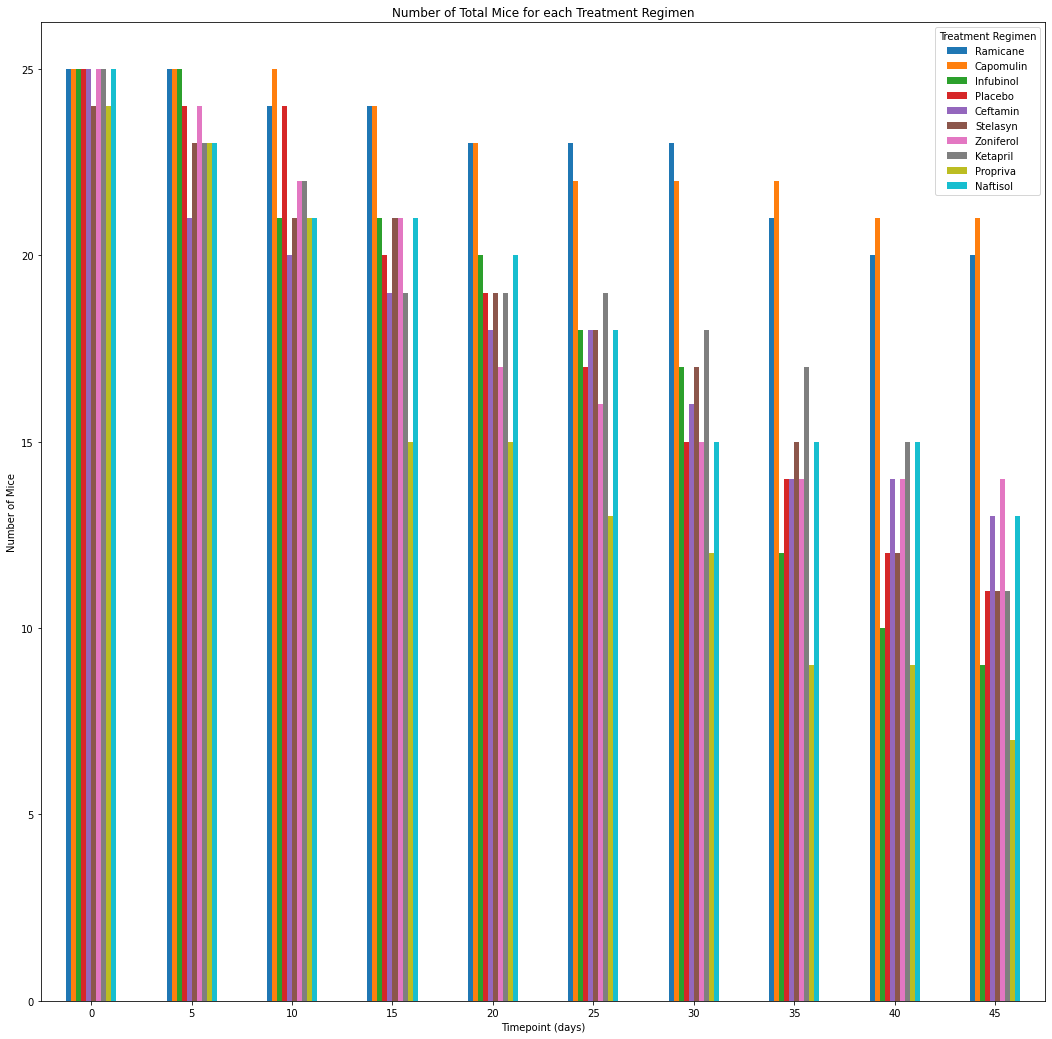

In [546]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Timepoints are 0,5,10,15,20,25,30,35,45 inclusive
# Drug Regimens are Ramicane, Capomulin, Infubinol, Placebo, Ceftamin, Stelasyn, Zoniferol, Ketapril, Propiva, Naftisol

num_mice_regimen = mouse_full_clean.groupby(["Drug Regimen", "Timepoint"], sort=False)["Mouse ID"].size()

num_mice_summary = pd.DataFrame( {
                            "Ramicane" : num_mice_regimen["Ramicane"], 
                            "Capomulin" : num_mice_regimen["Capomulin"], 
                            "Infubinol" : num_mice_regimen["Infubinol"],
                            "Placebo" : num_mice_regimen["Placebo"],
                            "Ceftamin" : num_mice_regimen["Ceftamin"],
                            "Stelasyn" : num_mice_regimen["Stelasyn"],
                            "Zoniferol" : num_mice_regimen["Zoniferol"],
                            "Ketapril" : num_mice_regimen["Ketapril"],
                            "Propriva" : num_mice_regimen["Propriva"],
                            "Naftisol" : num_mice_regimen["Naftisol"]
                            },
                           )

%matplotlib inline
ax = num_mice_summary.plot(kind="bar", figsize=(18,18), rot=0, width=0.5, title="Number of Total Mice for each Treatment Regimen", xlabel="Timepoint (days)", ylabel="Number of Mice");
plt.legend(title="Treatment Regimen")
# plt.show() 
# num_mice_summary
pass;

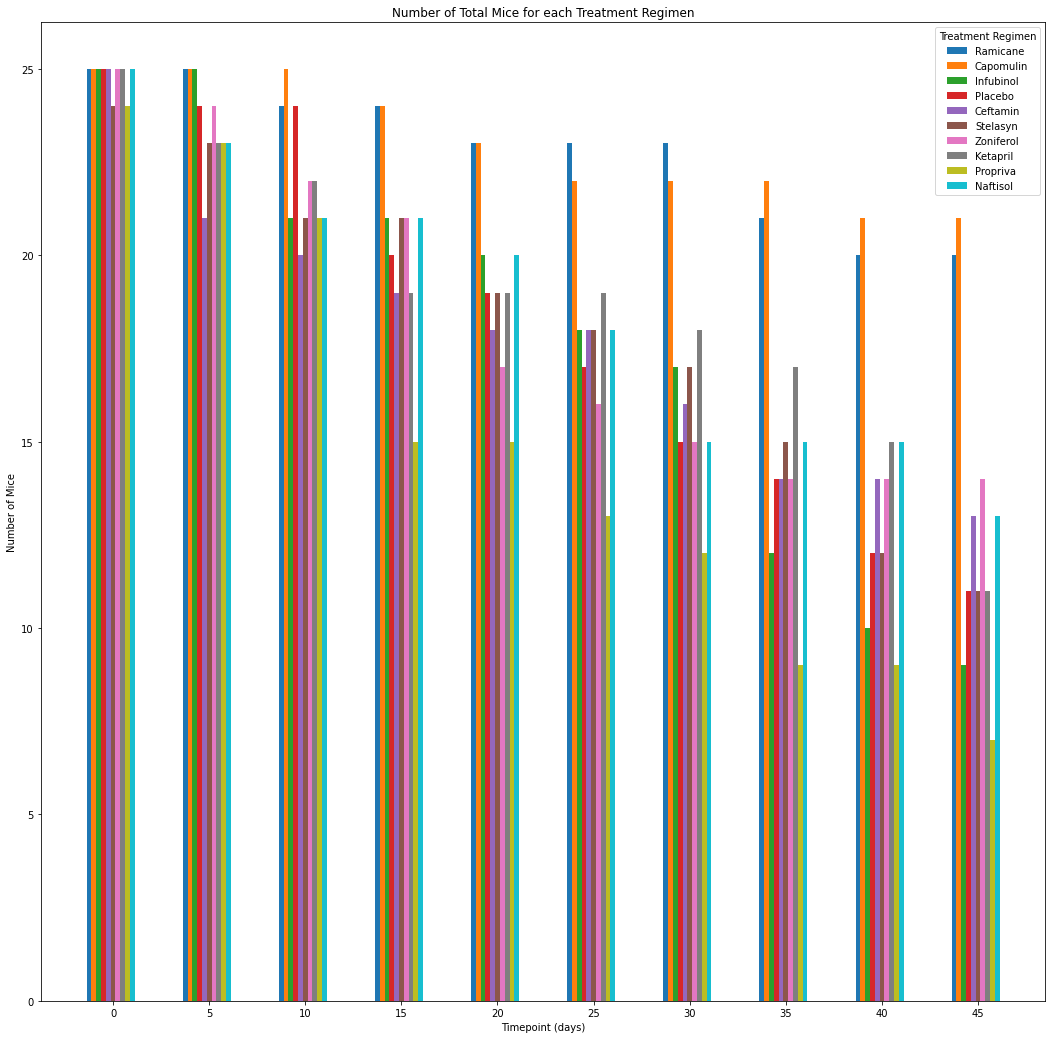

In [545]:
%matplotlib inline
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig, ax = plt.subplots(figsize=(18, 18))
timepoint = np.arange(0,50,5)
max_mice = 25
bar_width = 0.25
offset = [-1.25,-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
for i in range(0,10):
    
    data = num_mice_summary.iloc[:,[i]]
    plt.bar(timepoint+offset[i], data[drug_regimens[i]], width=bar_width)
    

ax.set_xticks(timepoint)
plt.title("Number of Total Mice for each Treatment Regimen")
plt.xlabel("Timepoint (days)")
plt.ylabel("Number of Mice")
drug_regimens = mouse_full_clean["Drug Regimen"].unique()
plt.legend(title="Treatment Regimen", labels = drug_regimens)
pass;

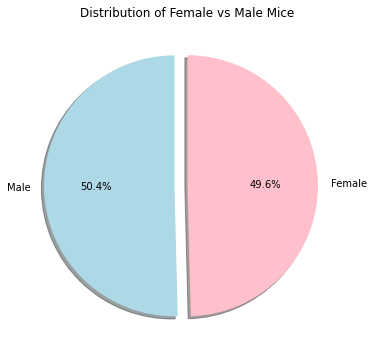

In [509]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# mouse_metadata_clean = mouse_metadata[mouse_metadata["Mouse ID"] != "g989"]
# num_mice_sex = mouse_metadata_clean.groupby(["Sex"], sort=False)["Mouse ID"].size()

num_mice_sex = mouse_full_clean.groupby(["Sex"], sort=False)["Mouse ID"].nunique()

num_mice_sex_mf = pd.DataFrame({
                                    "Number of Mice" : num_mice_sex 
                               },)

# Calulate the percentage of mice for each sex by dividing the amount in each sex by the previous num_mice
# Multiply this by 100 to convert to a percentage
# Name column Percentage of Mice
num_mice_sex_mf["Percentage of Mice"] = round(((num_mice_sex_mf["Number of Mice"] / num_mice) * 100),1)

colors = ["lightblue","pink"]
explode = (0.1,0)
ax = num_mice_sex_mf["Number of Mice"].plot(kind="pie", figsize=(6,6), explode=explode, colors=colors, shadow=True, startangle=90, title="Distribution of Female vs Male Mice", ylabel='', autopct = "%1.1f%%" );



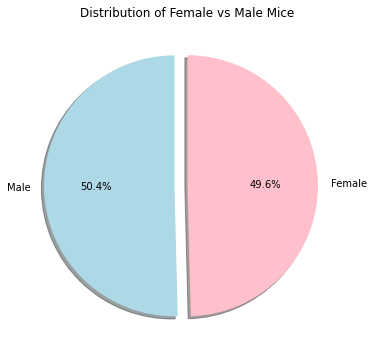

In [510]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib inline
fig = plt.figure(figsize=(6,6))
mice_labels = ["Male", "Female"]
num_mice_mf = [num_mice_sex_mf["Number of Mice"][0], num_mice_sex_mf["Number of Mice"][1]]

colors = ["lightblue","pink"]
explode = (0.1,0)
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(num_mice_mf, explode=explode, labels=mice_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Create axes which are equal so we have a perfect circle
# plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [699]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_tp = mouse_full_clean.groupby(["Mouse ID"], sort=False)["Timepoint"].max()
mouse_max_tp
mouse_max_timepoint = pd.DataFrame({ 
                                        "Max Timepoint" : mouse_max_tp
                                   })
mouse_max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_merge_maxtp = pd.merge(mouse_full_clean, mouse_max_timepoint, how="inner", on="Mouse ID")
# mouse_regimen_volume = mouse_merge_maxtp.loc[mouse_merge_maxtp["Timepoint"] == mouse_merge_maxtp["Max Timepoint"], ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
mouse_regimen_volume = mouse_merge_maxtp.loc[mouse_merge_maxtp["Timepoint"] == mouse_merge_maxtp["Max Timepoint"], ["Mouse ID", "Drug Regimen", "Sex", "Age_months","Weight (g)", "Timepoint","Tumor Volume (mm3)", "Metastatic Sites"]]

# mouse_regimen_volume.set_index("Mouse ID", inplace=True)
mouse_regimen_volume


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9        k403     Ramicane    Male          21          16         45   
19       s185    Capomulin  Female           3          17         45   
29       x401    Capomulin  Female          16          15         45   
39       m601    Capomulin    Male          22          17         45   
49       g791     Ramicane    Male          11          16         45   
...       ...          ...     ...         ...         ...        ...   
1846     z314     Stelasyn  Female          21          28          5   
1849     z435     Propriva  Female          12          26         10   
1859     z581    Infubinol  Female          24          25         45   
1869     z795     Naftisol  Female          13          29         45   
1879     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
9              22.050126                 1  
19             23.343598                 1  
29             28.484033                 0  
39             28.430964                 1  
49             29.128472                 1  
...                  ...               ...  
1846           45.934712                 0  
1849           48.710661                 0  
1859           62.754451                 3  
1869           65.741070                 3  
1879           73.867845                 4  

[248 rows x 8 columns]

In [712]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_top4 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in regimen_top4:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_subset = mouse_regimen_volume.loc[mouse_regimen_volume["Drug Regimen"] == regimen, ["Tumor Volume (mm3)"]]

    tumor_data_series = tumor_subset["Tumor Volume (mm3)"]
    # add subset 
    data_list = tumor_data_series.to_list()
    tumor_volume_data[regimen] = data_list
    
tumor_volume_data_df = pd.DataFrame.from_dict(tumor_volume_data)
# tumor_volume_data_df = pd.DataFrame(tumor_volume_data)

summary_volume_outliers = pd.DataFrame(columns=["Drug Regimen","Lower Quartile","Upper Quartile","IQR","Median","Lower Bound","Upper Bound"])
summary_outliers = pd.DataFrame(columns=["Mouse ID", "Drug Regimen", "Sex", "Age_months","Weight (g)", "Timepoint","Tumor Volume (mm3)", "Metastatic Sites"])

outliers_dict = {}
# Determine outliers using upper and lower bounds
for regimen in regimen_top4:
    
    outliers = []
    list_data = []
    quartiles = tumor_volume_data_df[regimen].quantile([0.25,0.5,0.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    median = round(quartiles[0.5], 2)
    iqr_full = quartiles[0.75] - quartiles[0.25]
    iqr = round((iqr_full),2)
    
    lower_bound = round((quartiles[0.25] - (1.5*iqr_full)),2)
    upper_bound = round((quartiles[0.75] + (1.5*iqr_full)),2)
    
    subset_volume_outliers = pd.DataFrame(data=[[regimen,lowerq,upperq,iqr,median,lower_bound, upper_bound]], columns=["Drug Regimen","Lower Quartile","Upper Quartile","IQR","Median","Lower Bound","Upper Bound"])                     
    summary_volume_outliers = pd.concat([summary_volume_outliers, subset_volume_outliers], ignore_index=True)
    
    list_data = tumor_volume_data[regimen]
    outliers = [number for number in list_data if ((number <  lower_bound) | (number > upper_bound))]
    outliers_dict[regimen] = outliers

    outlier_data = mouse_regimen_volume.loc[(mouse_regimen_volume["Drug Regimen"] == regimen) & ((mouse_regimen_volume["Tumor Volume (mm3)"] < lower_bound) | (mouse_regimen_volume["Tumor Volume (mm3)"] > upper_bound)), ["Mouse ID", "Drug Regimen", "Sex", "Age_months","Weight (g)", "Timepoint","Tumor Volume (mm3)", "Metastatic Sites"]]
    summary_outliers = pd.concat([summary_outliers, outlier_data], ignore_index=True)
    
#print("Possible Outliers in Final Tumor Data by Drug Regimen\n")
#print("------------------------------------------------\n")
#for regimen in regimen_top4:
    # print(f"{regimen}\t{outliers_dict[regimen]}\n")
 #   print(f"{regimen}\t{np.around(outliers_dict[regimen],decimals=2)}\n")
    
# for regimen in regimen_top4:
#        outlier_test = mouse_regimen_volume.loc[(mouse_regimen_volume["Drug Regimen"] == regimen) & ((mouse_regimen_volume["Tumor Volume (mm3)"] < summary_volume_outlierslower_bound) | (mouse_regimen_volume["Tumor Volume (mm3)"] > upper_bound))]
        
# summary_volume_outliers.set_index("Drug Regimen", inplace=True)
# summary_volume_outliers

print("Possible Outliers in Final Tumor Data For Selected Drug Regimens\n")
print("Selected Drug Regimens -- Capomulin, Ramicane, Infubinol, Ceftamin")
print("--------------------------------------------------------------------\n")
display(summary_outliers)

print("\n\nSummary Table of Quartiles, IQR, Median, Lower Bound, Upper Bound for Final Tumor Volume (mm3)\n")
print("----------------------------------------------------------------------------------------------\n")
display(summary_volume_outliers)

Possible Outliers in Final Tumor Data For Selected Drug Regimens

Selected Drug Regimens -- Capomulin, Ramicane, Infubinol, Ceftamin
--------------------------------------------------------------------



Mouse ID Drug Regimen     Sex Age_months Weight (g) Timepoint  \
0     c326    Infubinol  Female         18         25         5   

   Tumor Volume (mm3) Metastatic Sites  
0           36.321346                0



Summary Table of Quartiles, IQR, Median, Lower Bound, Upper Bound for Final Tumor Volume (mm3)

----------------------------------------------------------------------------------------------



Drug Regimen  Lower Quartile  Upper Quartile    IQR  Median  Lower Bound  \
0    Capomulin           32.38           40.16   7.78   38.13        20.70   
1     Ramicane           31.56           40.66   9.10   36.56        17.91   
2    Infubinol           54.05           65.53  11.48   60.17        36.83   
3     Ceftamin           48.72           64.30  15.58   59.85        25.36   

   Upper Bound  
0        51.83  
1        54.31  
2        82.74  
3        87.67

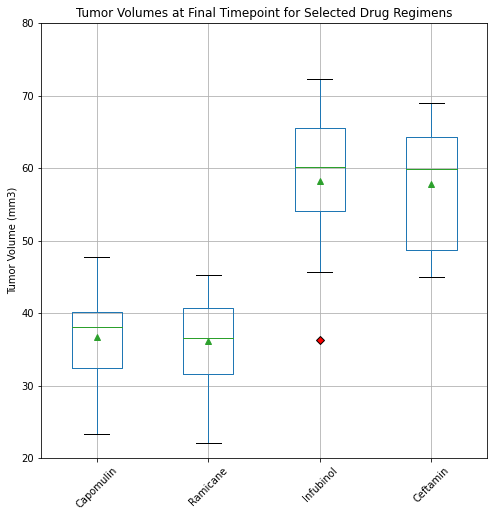

In [713]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(8,8))

ax1.set_title('Tumor Volumes at Final Timepoint for Selected Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
red_diamond = dict(markerfacecolor='r', marker='D')
ax1.set_ylim(20,80)
# ax = tumor_volume_data_df.boxplot(column=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], ax=ax1, rot=0, grid=True, showmeans=True, flierprops=red_diamond)
ax = tumor_volume_data_df.boxplot(column=regimen_top4, ax=ax1, rot=45, grid=True,  whis = 1.5, showmeans=True, flierprops=red_diamond)
plt.show()

## Line and Scatter Plots

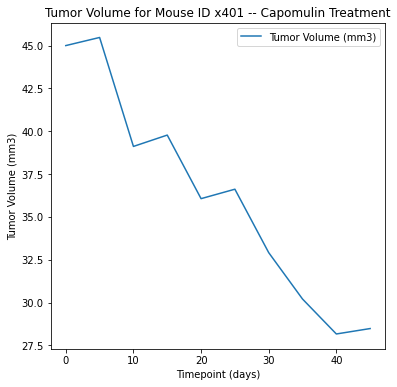

In [538]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Mouse ID = x401

mouse_x401 = mouse_full_clean.loc[mouse_full_clean["Mouse ID"] == "x401"]
timepoint = np.arange(0,50,5)
mouse_x401_volume = mouse_x401[["Timepoint", "Tumor Volume (mm3)"]]
mouse_x401_volume.set_index("Timepoint", inplace=True)
mouse_x401_volume
ax = mouse_x401_volume.plot(figsize=(6,6), title="Tumor Volume for Mouse ID x401 -- Capomulin Treatment", xlabel="Timepoint (days)", ylabel="Tumor Volume (mm3)")

Weight (g)  Mean Tumor Volume (mm3)
0          15                36.182040
1          17                37.214133
2          19                41.182391
3          20                39.141053
4          21                42.088700
5          22                43.288490
6          23                43.341051
7          24                44.805810
8          25                44.062109

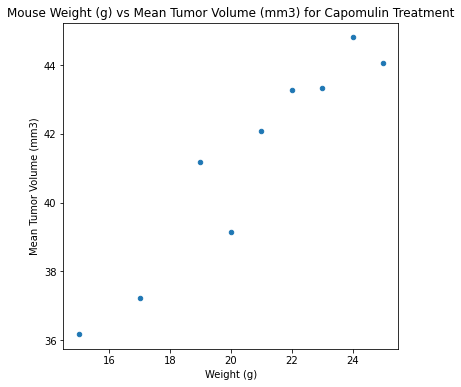

In [761]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight_volume = mouse_full_clean.loc[mouse_full_clean["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Timepoint", "Tumor Volume (mm3)"]]
mean_tumor_volume = mouse_weight_volume.groupby(["Weight (g)"], sort=True)["Tumor Volume (mm3)"].mean()
#mouse_weights = mouse_weight_volume["Weight (g)"]
#mouse_weights_unique = mouse_weight.unique()
#mouse_weights_sort = np.sort(mouse_weights_unique)
weights_vs_mean_volumes = mean_tumor_volume.reset_index()
weights_vs_mean_volumes_final = weights_vs_mean_volumes.rename(columns = {"Tumor Volume (mm3)" : "Mean Tumor Volume (mm3)"})
ax1 = weights_vs_mean_volumes_final.plot(x="Weight (g)", y="Mean Tumor Volume (mm3)", kind="scatter", figsize=(6,6), title="Mouse Weight (g) vs Mean Tumor Volume (mm3) for Capomulin Treatment")

weights_vs_mean_volumes_final


## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.95

The r-squared value is: 0.9034966277438604

The linear regression model is: y = 0.89x + 22.76 (where x is mouse weight and y is the predicted mean tumor volume)


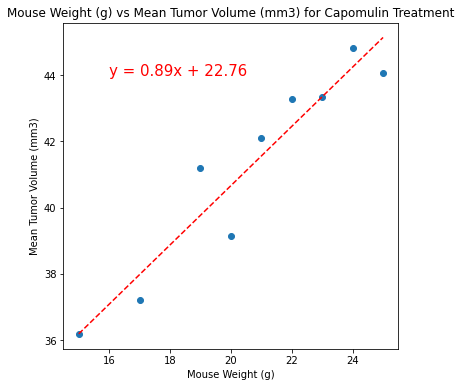

In [765]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

fig2, ax2 = plt.subplots(figsize=(6,6))

mouse_weight = weights_vs_mean_volumes_final.iloc[:,0]
avg_tumor_volume = weights_vs_mean_volumes_final.iloc[:,1]
plt.scatter(mouse_weight,avg_tumor_volume)

correlation_coefficient = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation_coefficient[0],2)}")
print(f"\nThe r-squared value is: {correlation_coefficient[0]**2}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"\nThe linear regression model is: {line_eq} (where x is mouse weight and y is the predicted mean tumor volume)")
plt.plot(mouse_weight,regress_values,"r--")
ax2.set_title("Mouse Weight (g) vs Mean Tumor Volume (mm3) for Capomulin Treatment")
ax2.set_xlabel("Mouse Weight (g)")
ax2.set_ylabel("Mean Tumor Volume (mm3)")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.show()